# Benchmarking

In this notebook we will test some naive methods, and use these as benchmark for the more advanced machine learning algorithms we will use to predict stock prices.

In [ ]:
import matplotlib

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from IPython.display import display

from data.get_50_highest_weights import get_sp_50_highest_weights_symbols
from data_preparation.ochlva_data import OCHLVAData
from utils.column_modifiers import target_generator
from utils.column_modifiers import keep_columns
from scorers.scorers import normalized_root_mean_square_error
from estimators.predictions import calculate_rolling_prediction
from estimators import latest_day

In [2]:
matplotlib.use('nbAgg')

In [3]:
import matplotlib.pyplot as plt

In [4]:
# Load the SP500 data
ochlva_data = OCHLVAData()

In [5]:
# Load three other stocks
symbols = get_sp_50_highest_weights_symbols()

# Select symbols with high, medium and low weights
selected_symbols = (symbols.iloc[0], symbols.iloc[len(symbols)//2], symbols.iloc[-1])

for s in selected_symbols:
    ochlva_data.load_data(s)

<IPython.core.display.Javascript object>


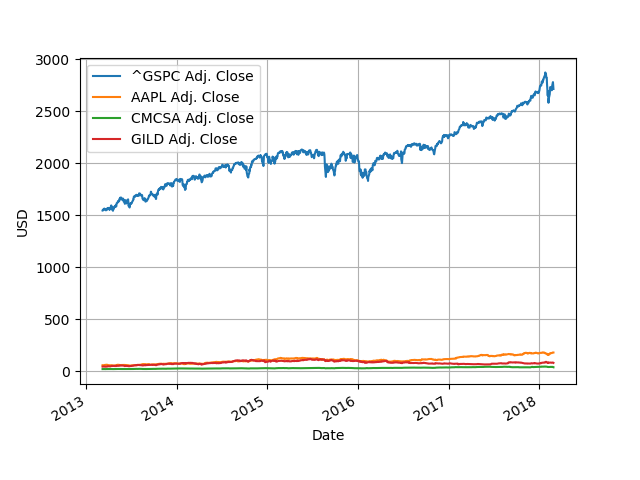

In [6]:
ax = ochlva_data.plot(['Adj. Close'])
plt.show()

In [7]:
# Keep only 'Adj. Close' column
ochlva_data.transform(keep_columns, ['Adj. Close'], copy=False)

In [8]:
# Create target values for the data
# The targets are columns shifted 7, 14 and 28 days with respect to 'Adj. Close'
ochlva_data.transform(target_generator, 'Adj. Close', [7, 14, 28], copy=False)

In [9]:
# Make the latest day regressor (note that only one is needed)
reg = latest_day.LatestDay()

Processing ^GSPC
Head of features


,Adj. Close
Date,
2013-03-07,1544.260010
2013-03-08,1551.180054
2013-03-11,1556.219971
2013-03-12,1552.479980
2013-03-13,1554.520020


Head of targets


,Adj. Close + 7 days,Adj. Close + 14 days,Adj. Close + 28 days
Date,,,
2013-03-07,1552.099976,1562.849976,1552.010010
2013-03-08,1548.339966,1569.189941,1541.609985
2013-03-11,1558.709961,1562.170044,1555.250000
2013-03-12,1545.800049,1570.250000,1562.500000
2013-03-13,1556.890015,1553.689941,1578.780029


Train shape: (1008, 1)
Test shape: (252, 1)


<IPython.core.display.Javascript object>


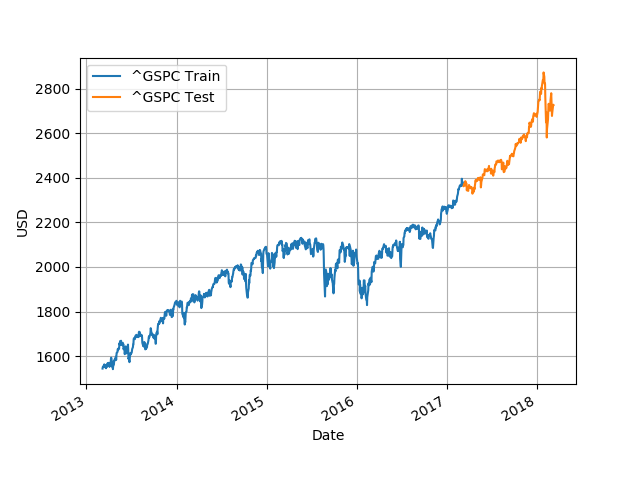

<IPython.core.display.Javascript object>


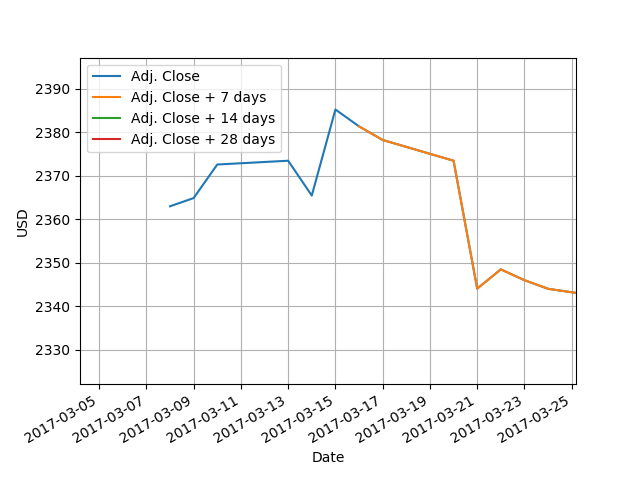

Normalized root mean squared error (averaged for the three predictions): 7.100282341180052
--------------------------------------------------------------------------------






Processing AAPL
Head of features


,Adj. Close
Date,
2013-03-07,56.151959
2013-03-08,56.300365
2013-03-11,57.102383
2013-03-12,55.871318
2013-03-13,55.860885


Head of targets


,Adj. Close + 7 days,Adj. Close + 14 days,Adj. Close + 28 days
Date,,,
2013-03-07,59.430192,58.955501,52.528924
2013-03-08,59.269788,57.727044,51.127022
2013-03-11,58.955501,55.933914,50.928800
2013-03-12,59.040267,56.048935,51.990333
2013-03-13,60.237426,56.335575,52.963187


Train shape: (1002, 1)
Test shape: (251, 1)


<IPython.core.display.Javascript object>


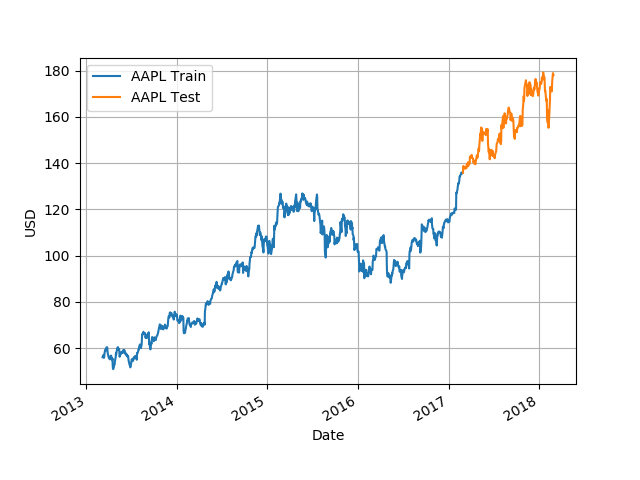

<IPython.core.display.Javascript object>


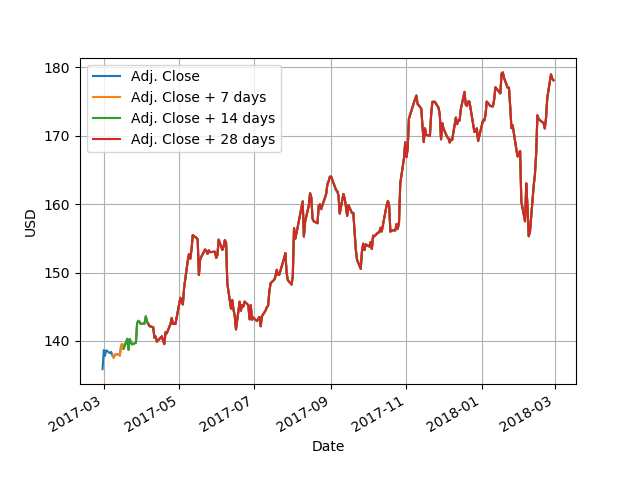

Normalized root mean squared error (averaged for the three predictions): 1.4972550837636298
--------------------------------------------------------------------------------






Processing CMCSA
Head of features


,Adj. Close
Date,
2013-03-07,18.735292
2013-03-08,18.910560
2013-03-11,18.972827
2013-03-12,18.781415
2013-03-13,18.721455


Head of targets


,Adj. Close + 7 days,Adj. Close + 14 days,Adj. Close + 28 days
Date,,,
2013-03-07,18.619983,19.256485,18.821263
2013-03-08,18.509287,19.362569,18.531634
2013-03-11,18.901335,19.175769,18.795776
2013-03-12,18.633820,19.600250,18.754069
2013-03-13,19.012031,19.379668,18.953334


Train shape: (1005, 1)
Test shape: (252, 1)


<IPython.core.display.Javascript object>


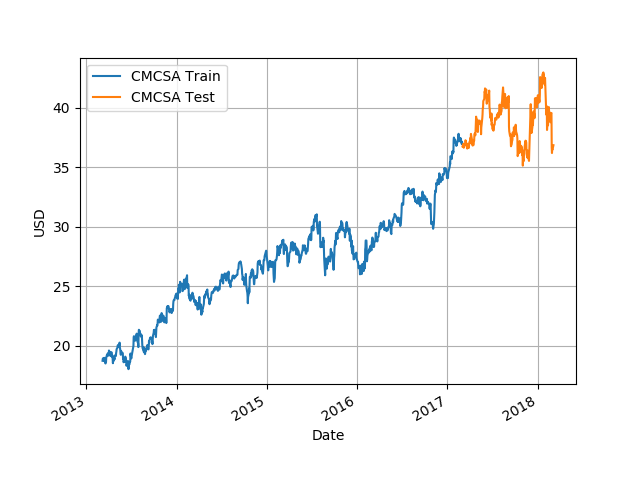

<IPython.core.display.Javascript object>


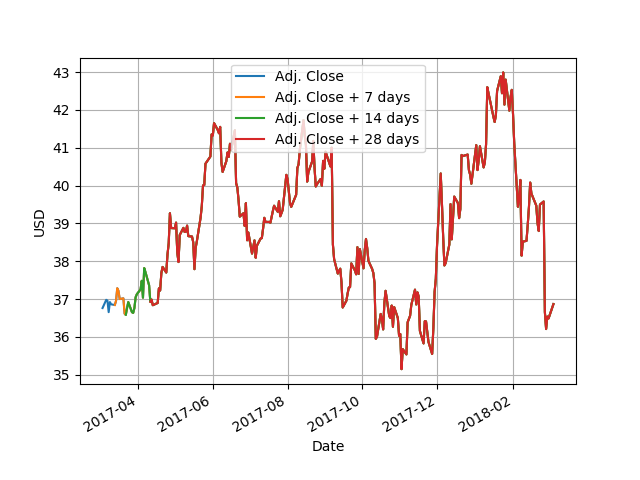

Normalized root mean squared error (averaged for the three predictions): 0.5236058768170588
--------------------------------------------------------------------------------






Processing GILD
Head of features


,Adj. Close
Date,
2013-03-07,42.484876
2013-03-08,42.938552
2013-03-11,43.420583
2013-03-12,43.647421
2013-03-13,43.354422


Head of targets


,Adj. Close + 7 days,Adj. Close + 14 days,Adj. Close + 28 days
Date,,,
2013-03-07,42.343102,45.102965,49.091534
2013-03-08,41.946136,46.256059,48.070763
2013-03-11,42.078458,45.348706,50.254079
2013-03-12,42.097361,45.556641,51.085819
2013-03-13,43.014165,45.017901,50.405305


Train shape: (1006, 1)
Test shape: (252, 1)


<IPython.core.display.Javascript object>


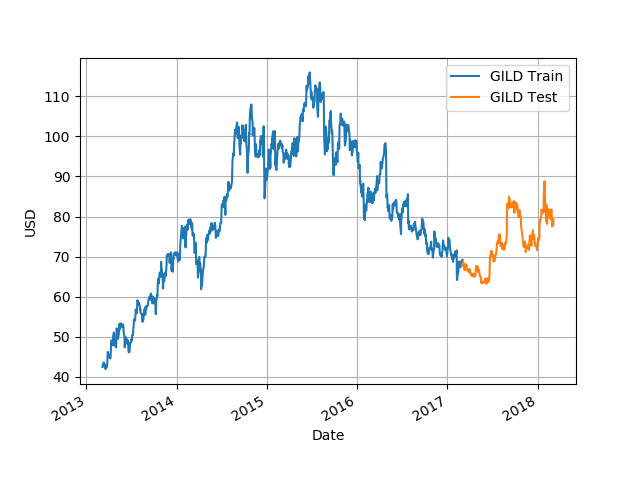

<IPython.core.display.Javascript object>


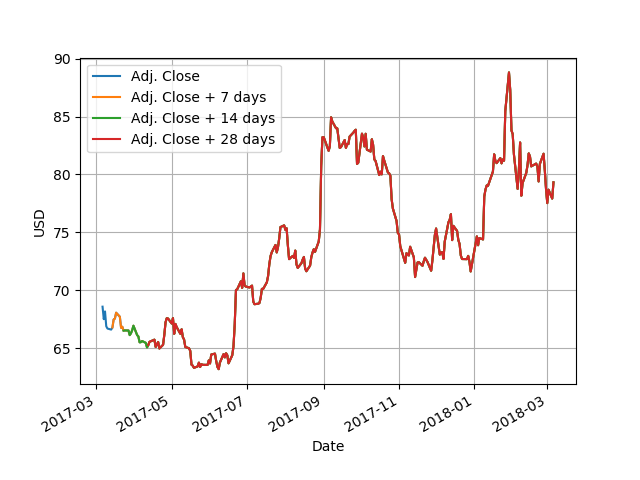

Normalized root mean squared error (averaged for the three predictions): 0.9555130275245597
--------------------------------------------------------------------------------








In [10]:
# Here we are looping through the symbols in ochlva
for key in ochlva_data.transformed_data.keys():
    print(f'Processing {key}')
    # Extract the features and targets
    # NOTE: We have multiple targets
    x = ochlva_data.transformed_data[key].loc[:, ochlva_data.transformed_data[key].columns[:-3]] 
    y = ochlva_data.transformed_data[key].loc[:, ochlva_data.transformed_data[key].columns[-3:]]

    print('Head of features')
    display(x.head())
    print('Head of targets')
    display(y.head())
    
    # NOTE: We could use sklearn.model_selection.TimeSeriesSplit for splitting the data
    # However, as we are not doing any form of cross-validation, it is here more convenient to utilize train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=False, test_size=.2)
    
    print(f'Train shape: {x_train.shape}')
    print(f'Test shape: {x_test.shape}')

    # Plot the train and test set
    ax = x_train.plot()
    _ = x_test.plot(ax=ax)
    ax.legend([f'{key} Train', f'{key} Test'])
    ax.grid()
    _ = ax.set_ylabel('USD')

    plt.show()
    
    # Make predictions
    y_pred = calculate_rolling_prediction(reg, x_train, x_test, y_train, y_test)
    
    
    
# FIXME: YOU ARE HERE:
# BUGS: Start y_pred != same value as start x_test
# BUGS: If the two are equal, then why is not the measured error = 0?????
    
    
    
    # Plot the predictions
    ax = x_test.plot()
    _ = y_pred.plot(ax=ax)
    ax.grid()
    _ = ax.set_ylabel('USD')
    
    plt.show()
    
    # As the first prediction is on the training set, we subtract 1 in the indexing to account for this
    # Calculate the normalized root mean squared error
    nrmse = normalized_root_mean_square_error(y_test, y_pred)
    
    print(f'Normalized root mean squared error (averaged for the three predictions): {nrmse}')
    
    print('-'*80)
    print('\n'*5)